## Observations and Insights 

1) There is a strong correlation between the weight of the mouse and the average size of the tumor for the mice treated with Capomulin

2) Capomulin was effective at lowering the tumor volume.

3) The drug regimens that recorded data at fewer timepoints such as Provpriva may be less accurate as a result.


In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drug_groupby = mouse_df.groupby(["Drug Regimen"])

gb_mean = drug_groupby.mean()["Tumor Volume (mm3)"]
gb_median = drug_groupby.median()["Tumor Volume (mm3)"]
gb_variance = drug_groupby.var()["Tumor Volume (mm3)"]
gb_standard_deviation = drug_groupby.std()["Tumor Volume (mm3)"]
gb_SEM = drug_groupby.sem()["Tumor Volume (mm3)"]


groupby_df = {
    "Mean" : gb_mean,
    "Median" : gb_median, 
    "Variance" : gb_variance,
    "Standard Deviation" : gb_standard_deviation,
    "SEM" : gb_SEM
 }

groupby_table = pd.DataFrame(groupby_df)
groupby_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
#agg_drugs = drug_df["Tumor Volume (mm3)"].agg("mean", "median", "var", "std", "sem")

## Bar and Pie Charts

<AxesSubplot:title={'center':'Timepoints per Drug Regimen'}, xlabel='Drug Regimen'>

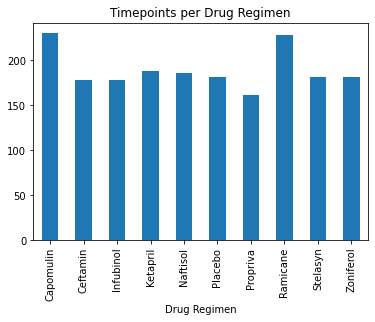

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_graph_data = drug_groupby["Timepoint"].count()


timepoint_graph_data.plot(kind = "bar", title= "Timepoints per Drug Regimen")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

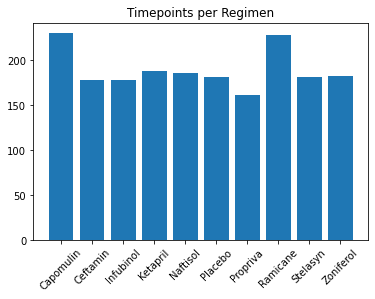

In [52]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(timepoint_graph_data.index, timepoint_graph_data.values)
plt.title("Timepoints per Regimen")
plt.xticks(rotation = 45)


<AxesSubplot:title={'center':'Sex Distibution'}, ylabel='Sex'>

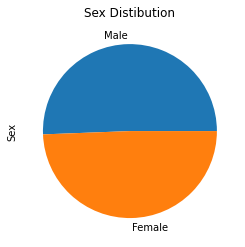

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_groupby = mouse_df["Sex"].value_counts()

sex_groupby.plot(kind= "pie", title= "Sex Distibution")


Text(0.5, 1.0, 'Sex Distibution')

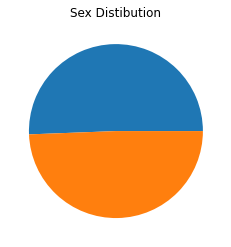

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_groupby.values)
plt.title("Sex Distibution")


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

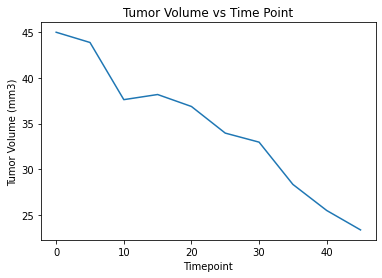

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# s185

chosen_mouse = mouse_df.loc[mouse_df["Mouse ID"] == "s185"]

plt.plot(chosen_mouse["Timepoint"], chosen_mouse["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs Time Point")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

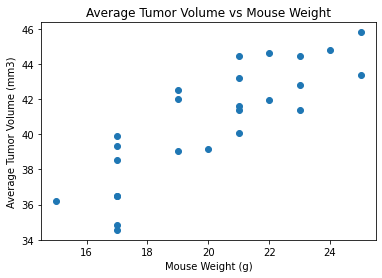

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
campomulin_data = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin"]
camp_mouse = campomulin_data.groupby(["Mouse ID"]).mean("Tumor Volume (mm3)")

plt.scatter(camp_mouse["Weight (g)"], camp_mouse["Tumor Volume (mm3)"])	
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [60]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr_coef = round(st.pearsonr(camp_mouse["Weight (g)"], camp_mouse["Tumor Volume (mm3)"])[0],2)
print(f'The Correlation Cofficient is {corr_coef}')
# 



The Correlation Cofficient is 0.84


Text(0, 0.5, 'Tumor Volume (mm3)')

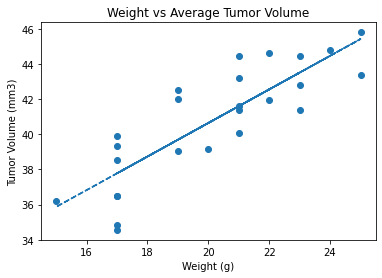

In [61]:
# Linear Regression
slope, intercept, rvalue, pvalue, stderr, = st.linregress(camp_mouse["Weight (g)"], camp_mouse["Tumor Volume (mm3)"])
lin_fit = slope * camp_mouse["Weight (g)"] + intercept

# Plot Liner Regression

plt.scatter(camp_mouse["Weight (g)"], camp_mouse["Tumor Volume (mm3)"])
plt.plot(camp_mouse["Weight (g)"],lin_fit,"--")
plt.title("Weight vs Average Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
